Let's begin by importing all the needed libraries,

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

and reading the dataset.

In [61]:
df = pd.read_csv("netflix_reviews.csv")

## Analysis: Getting an initial grasp of the Dataset.

Let's begin by getting some initial information about the dataset.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113610 entries, 0 to 113609
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113610 non-null  object
 1   userName              113608 non-null  object
 2   content               113608 non-null  object
 3   score                 113610 non-null  int64 
 4   thumbsUpCount         113610 non-null  int64 
 5   reviewCreatedVersion  96972 non-null   object
 6   at                    113610 non-null  object
 7   appVersion            96972 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


---

We can see that we have 1113610 rows and 8 columns. And also that we have some missing values.

Here are the **8 columns**:

- reviewId: A unique identifier for each review.
- userName: The name of the user who submitted the review.
- content: The actual text of the review.
- score: The rating given, ranging from 1 to 5.
- thumbsUpCount: The number of "thumbs up" the review received.
- reviewCreatedVersion: __TODO__
- at: The date and time the review was posted.
- appVersion: The version of the app used when the review was written.

Let's have now a preview of the dataset.

In [63]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,cc1cfcd2-dc8a-4ead-88d1-7f2b2dbb2662,NR Bharadwaj,Plsssss stoppppp giving screen limit like when...,2,0,8.120.0 build 10 50712,2024-07-02 17:17:53,8.120.0 build 10 50712
1,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
2,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN
3,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
4,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626


We can see below that there are some missing values in the dataset:

In [64]:
df.isna().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16638
at                          0
appVersion              16638
dtype: int64

Later in the project, we'll fill in the missing values using this command:

In [65]:
df.fillna('', inplace=True)

## Visualization: Inspecting the Data.

Let's begin by visualizing the distribution of the ratings.

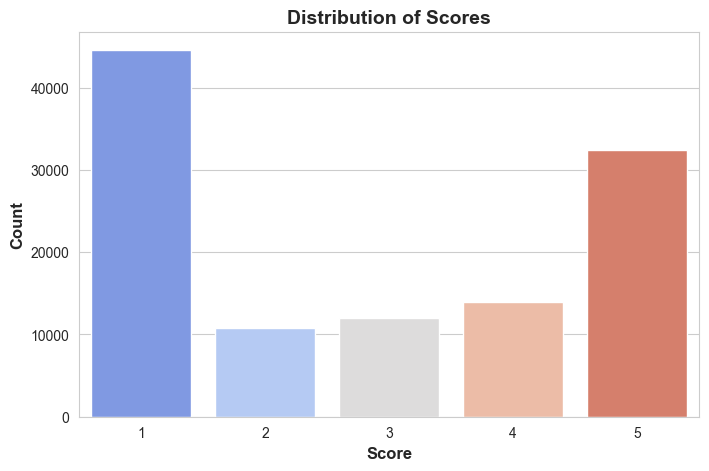

In [66]:
sns.set_style("whitegrid")

score_counts = df['score'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

palette = sns.color_palette("coolwarm", len(score_counts))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=palette, legend=False)

plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Scores', fontsize=14, fontweight='bold')

plt.show()

We can also check the number of reviews over time.

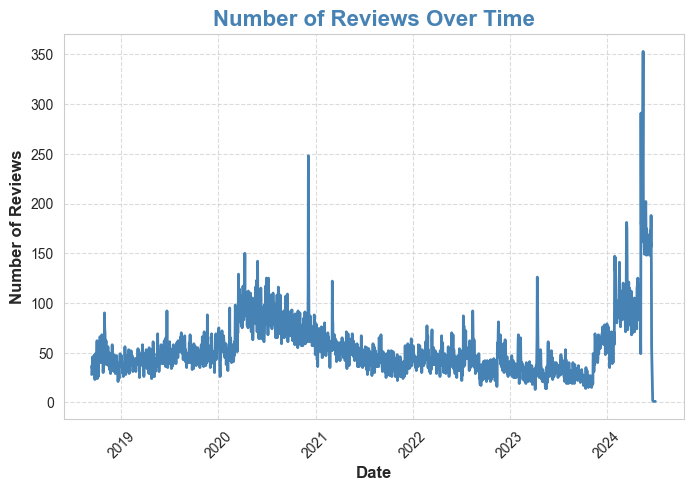

In [67]:
df['review_date'] = pd.to_datetime(df['at']).dt.date

date_counts = df['review_date'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

date_counts.plot(kind='line', color='steelblue', lw=2) 

plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

We can also determine the dates of the earliest and latest reviews.

In [68]:
print("Earliest review date:", df['at'].min())
print("Latest review date:", df['at'].max())

Earliest review date: 2018-09-12 07:22:12
Latest review date: 2024-07-02 17:17:53


Let's also check how long the reviews are.

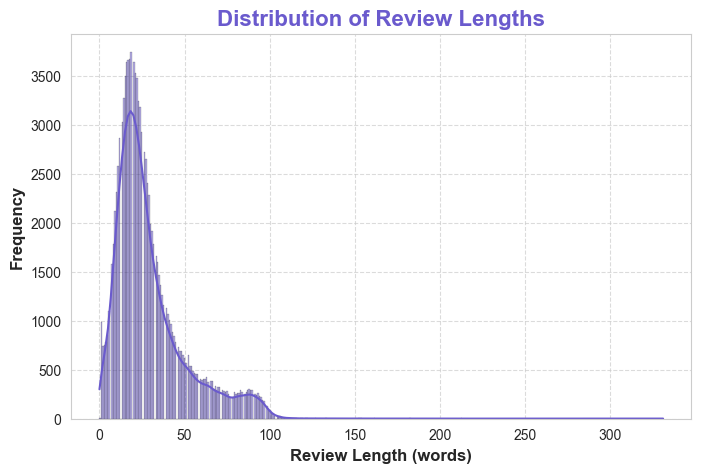

In [69]:
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))

sns.histplot(data=df, x='review_length', color='slateblue', kde=True, edgecolor='black')

plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold', color='slateblue')
plt.xlabel('Review Length (words)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

And lastly, we can see how many reviews were given for each year.

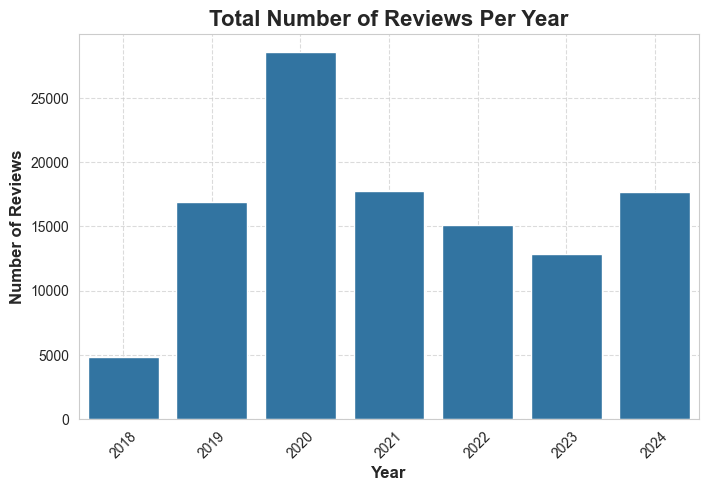

In [70]:
df['at'] = pd.to_datetime(df['at'])

year_counts = df['at'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, legend=False)

plt.title('Total Number of Reviews Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()